# Alumno: Gerardo de Miguel González

## Bibliotecas Numpy, Pandas y Matplotlib

In [0]:
#::GMG::Importamos lo necesario para hacer la práctica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import requests
#import io

## Núcleos de  Población

### Archivo CSV

Descargue el fichero núcleos de población. Usando PANDAS, contestar en el notebook, a las siguientes preguntas:

In [0]:
#::GMG::Importamos un fichero csv y lo llamamos ndp (núcleos de población)
# https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url
#ndp = pd.read_csv(
#    io.StringIO(
#        requests.get(
#            'https://raw.githubusercontent.com/yerartdev/uc-m1967-mdsi/master/d8/Centroides_NucleosPoblacion.csv'
#        ).content.decode('utf-8'))
#)
ndp = pd.read_csv(
    'https://raw.githubusercontent.com/yerartdev/uc-m1967-mdsi/master/d8/Centroides_NucleosPoblacion.csv'
)

In [0]:
#::GMG::Estudiamos la estructura de los datos que hemos importado
indice=ndp.index
columnas=ndp.columns
valores=ndp.values

In [0]:
print('Indice: {} \n\nColumnas: {} \n\nValores: \n{}'.format(
    indice, 
    columnas, 
    valores[:5]
    )
)

Indice: RangeIndex(start=0, stop=852, step=1) 

Columnas: Index(['FID', 'OBJECTID', 'Cod_INE', 'Localidad', 'Poblacion', 'CodMun',
       'Municipio', 'Cod_Provin', 'Provincia', 'Longitud', 'Latitud'],
      dtype='object') 

Valores: 
[[0 1 35002000101 'Agüimes' 29431.0 35002 'Agüimes' 35 'Las Palmas'
  -15.446012264 27.9005418852]
 [1 2 35003000201 'Antigua' 10458.0 35003 'Antigua' 35 'Las Palmas'
  -14.01330083 28.418966224200002]
 [2 3 35004000301 'Arrecife' 58156.0 35004 'Arrecife' 35 'Las Palmas'
  -13.551451235 28.9606494152]
 [3 4 35006000202 'Arucas' 36745.0 35006 'Arucas' 35 'Las Palmas'
  -15.521511534000002 28.1174962002]
 [4 5 35009000303 'Gáldar' 24473.0 35009 'Gáldar' 35 'Las Palmas'
  -15.654110982999999 28.1438727542]]


In [0]:
ndp.head()

,FID,OBJECTID,Cod_INE,Texto,Poblacion,CodMun,Municipio,Cod_Provin,Provincia,X,Y
0,0,1,35002000101,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,35003000201,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,35004000301,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,35006000202,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,35009000303,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


In [0]:
#::GMG::Hay una columna que resulta ambigua en el dataset: Texto
#       Voy a cambiarla por Localidad
#
#       https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
#       https://es.wikipedia.org/wiki/Localidad
#
#       Otras dos, i.e. X e Y tampoco son informativas y las voy a cambiar por
#       que corresponden a Latitud, Longitud
#
# https://journeynorth.org/tm/LongitudeIntro.html
# https://latitude.to/articles-by-country/es/spain/140414/bay-of-santander
ndp = ndp.rename(columns={'Texto': 'Localidad',
                          'X': 'Longitud', 
                          'Y': 'Latitud'}
                )
ndp.head()

,FID,OBJECTID,Cod_INE,Localidad,Poblacion,CodMun,Municipio,Cod_Provin,Provincia,Longitud,Latitud
0,0,1,35002000101,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,35003000201,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,35004000301,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,35006000202,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,35009000303,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


In [0]:
#::GMG::Ahora las columnas finalmente son:
ndp.columns

Index(['FID', 'OBJECTID', 'Cod_INE', 'Localidad', 'Poblacion', 'CodMun',
       'Municipio', 'Cod_Provin', 'Provincia', 'Longitud', 'Latitud'],
      dtype='object')

In [0]:
#::GMG::Una idea del tamaño del dataset que tenemos entre manos
ndp.shape

(852, 11)

###  **Ejercicio 1** 


- ¿Cuántos Municipios tienen más de 100000 habitantes? 

In [0]:
#::GMG::Usamos loc con selección condicional para seleccionar las localidades
#
# https://www.youtube.com/watch?v=xvpNA7bC8cs 
#
#mas_de_100k = ndp[ndp.Poblacion > 100000].loc[:,['Localidad']]
mas_de_100k = ndp.loc[ndp.Poblacion > 100000,['Localidad']]
print('Hay {} poblaciones con más de 100k habitantes.'.format(
    len(mas_de_100k['Localidad'])
   )
)
#::GMG::Pero esto NO es lo que nos piden ... 
#       lo que hemos hecho es calcular las poblaciones de más de 100k habitantes (!!)

Hay 62 poblaciones con más de 100k habitantes.


In [0]:
#::GMG::Lo que hay que hacer agrupar por municipios las poblaciones (!!)
#
# https://www.youtube.com/watch?v=qy0fDqoMJx8
#
habitantes_municipios = ndp[['Municipio','Poblacion']].groupby('Municipio').sum()
print('Hay {} municipios con más de 100k habitantes.'
      .format(
          len(habitantes_municipios[habitantes_municipios.Poblacion > 100000])
      )
     )

Hay 75 municipios con más de 100k habitantes.


- ¿Cuál es la segunda ciudad más poblada?

In [0]:
#::GMG::Para obtener la segunda ciudad más poblada tenemos que obtener la lista ordenada de
#       menor a  mayor de Poblaciones y Habitantes y seleccionar el segundo elemento por la cola
#       de esa lista
#ndp.sort_values('Habitantes').iloc[-2]
print('La segunda ciudad más poblada es: \n\n{}'
      .format(
          ndp[['Localidad','Poblacion']].sort_values('Poblacion').iloc[-2]
      )
     )

La segunda ciudad más poblada es: 

Localidad      Barcelona
Poblacion    1.61934e+06
Name: 623, dtype: object


- ¿Qué posición ocupa Granada en el ranking de las más pobladas?

In [0]:
#::GMG::Podemos sacar una lista ordenada hasta la posición de Granada 
mas_pobladas = ndp.sort_values(by='Poblacion', 
                               ascending=False)[['Localidad','Poblacion']]
mas_pobladas.head(18)
#::nota::vemos que granada está en la posición "18"

,Localidad,Poblacion
355,Madrid,3273049.0
623,Barcelona,1619337.0
561,Valencia,809267.0
492,Sevilla,704198.0
591,Zaragoza,675121.0
391,Málaga,568507.0
420,Murcia,441345.0
610,Palma,404681.0
9,Las Palmas de Gran Canaria,383308.0
571,Bilbao,353187.0


In [0]:
#::GMG::Podemos localizar fácilmente Granada dentro del Dataframe de poblaciones
#       ordenadas por número de habitantes.
#       Vemos que "Granada" tiene un índice 272 en el Dataframe original
mas_pobladas.loc[mas_pobladas['Localidad'] == 'Granada']

,Localidad,Poblacion
272,Granada,239154.0


In [0]:
#::GMG::Para obtener el index label
# https://stackoverflow.com/questions/21800169/python-pandas-get-index-of-rows-which-column-matches-certain-value
mas_pobladas.index[mas_pobladas['Localidad'] == 'Granada'].tolist()[0]

272

In [0]:
#::GMG::La pregunta que tenemos que hacernos es, ¿podemos obtener la posición
#       del índice de Granada dentro de los índices del nuevo Dataframe de
#       poblaciones ordenadas?
#       Este es el índice del que estamos hablando
mas_pobladas.index

Int64Index([355, 623, 561, 492, 591, 391, 420, 610,   9, 571,
            ...
            756, 841, 193, 503,  97, 525, 746, 168, 115, 307],
           dtype='int64', length=852)

In [0]:
#::GMG::Existe un método en pandas que nos permite localizar un índice concreto
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.get_loc.html
#
# ¿Cuál es la posición del índice de Granada?
# 
mas_pobladas.index.get_loc(
    mas_pobladas.index[mas_pobladas['Localidad'] == 'Granada'].tolist()[0])

17

In [0]:
#::GMG::Solamente tenemos que recordar que en Python los índices empiezan por 0
#       por lo que la posición es índice + 1
print('Granada está en la posición {} de la lista de las más pobladas'
      .format(
          mas_pobladas.index.get_loc(
    mas_pobladas.index[mas_pobladas['Localidad'] == 'Granada'].tolist()[0]) + 1
      )
     )

Granada está en la posición 18 de la lista de las más pobladas


### Ejercicio 2

Escriba los nombres de los 10 municipios con menos población.


In [0]:
#::GMG::Aquí hablamos de nuevo de 'municipios' por lo que hay necesidad de 
#       agrupamiento. Primero tenemos que obtener la lista ordenada de menor a 
#       mayor número de habitantes de los municipios y coger los 10 primeros
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
habitantes_municipios = ndp[
    ['Municipio','Poblacion']
].groupby('Municipio').sum()
#habitantes_municipios.head()
menos_mas_poblados = habitantes_municipios.sort_values(
    by='Poblacion', ascending=True
)
print(menos_mas_poblados.head(10))

                Poblacion
Municipio                
Zumarraga         10037.0
Caldas de Reis    10045.0
Amurrio           10050.0
Premià de Dalt    10064.0
Buñol             10077.0
Bembibre          10097.0
Ocaña             10098.0
Sax               10099.0
Xinzo de Limia    10245.0
Reinosa           10277.0


In [0]:
#::GMG::Más compacto, 10 primeros elementos de la lista de habitantes por 
#municipio ordenada de menor a mayor
ndp.groupby('Municipio').Poblacion.sum().sort_values().head(10)

Municipio
Zumarraga         10037.0
Caldas de Reis    10045.0
Amurrio           10050.0
Premià de Dalt    10064.0
Buñol             10077.0
Bembibre          10097.0
Ocaña             10098.0
Sax               10099.0
Xinzo de Limia    10245.0
Reinosa           10277.0
Name: Poblacion, dtype: float64

### Ejercicio 3

¿Cuántos municipios de León tienen más de 6000 habitantes?.


In [0]:
#::GMG::Aquí en primer lugar tenemos que seleccionar todos los municipios
#       dentro de la provincia de León e indexarlos con un condicional
#       sobre el número de sus habitantes
poblaciones_leon = ndp[ndp['Provincia'] == 'León']
#::GMG::Los municipios de León tienen una sola población por lo que no
#       hace fakta hacer ninguna agregación
poblaciones_leon.loc[:,['Localidad','Municipio', 'Poblacion']]

,Localidad,Municipio,Poblacion
96,Astorga,Astorga,12015.0
97,Bembibre,Bembibre,10097.0
98,Ponferrada,Ponferrada,68767.0
99,Villablino,Villablino,10553.0
327,La Bañeza,La Bañeza,11050.0
328,León,León,134012.0
329,San Andrés del Rabanedo,San Andrés del Rabanedo,31306.0
330,Villaquilambre,Villaquilambre,17631.0
751,Trobajo del Camino,San Andrés del Rabanedo,21231.0


In [0]:
mas_de_6k = poblaciones_leon.loc[poblaciones_leon['Poblacion'] > 6000,
                                 ['Municipio', 'Poblacion']
                                ]
print(mas_de_6k.sort_values(by='Poblacion', ascending=True))

                   Municipio  Poblacion
97                  Bembibre    10097.0
99                Villablino    10553.0
327                La Bañeza    11050.0
96                   Astorga    12015.0
330           Villaquilambre    17631.0
751  San Andrés del Rabanedo    21231.0
329  San Andrés del Rabanedo    31306.0
98                Ponferrada    68767.0
328                     León   134012.0


### Ejercicio 4

¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.


In [0]:
#::GMG::Lo que queremos saber es cuál es el municipio que se encuentra
#       más el norte, que será el que tenga la población que se encuentra
#       más al norte, la que tenga la latitud más alta.
#       Además queremos saber a qué provincia pertenece el municipio
#       y el número de habitantes que tiene.  
#
#::GMG::La población que tiene la latitud más alta es
ndp.loc[ndp.Latitud == ndp.Latitud.max(),
        ['Localidad','Municipio', 'Provincia', 'Poblacion']
       ]

,Localidad,Municipio,Provincia,Poblacion
104,Viveiro,Viveiro,Lugo,16211.0


In [0]:
#::GMG::A aprtir de aquí ya tenemos la respuesta
municipio_mas_al_norte = ndp.loc[ndp.Latitud == ndp.Latitud.max(), 
                                 'Municipio'].iloc[0]
print('''El municipio situado más al norte es {} 
que pertenece a la provincia de {} y tiene {} habitantes.'''.format(
   municipio_mas_al_norte,
   ndp[ndp.Municipio == municipio_mas_al_norte]['Provincia'].iloc[0],
   ndp[ndp.Municipio == municipio_mas_al_norte].groupby(
       'Municipio').sum()['Poblacion'].iloc[0]
     )
)

El municipio situado más al norte es Viveiro 
que pertenece a la provincia de Lugo y tiene 16211.0 habitantes.


### Ejercicio 5

¿Cual es el municipio de la provincia de Cantabria situado más al Este?. ¿Cual es el situado más al Oeste?.


In [0]:
#::GMG::Hagamos 'inventario' de las localidades y municipios de Cantabria ...
localidades_cantabria = ndp.loc[ndp.Provincia == 'Cantabria',
                               ['Localidad',
                                'Municipio',
                                'Latitud',
                                'Longitud']
                              ]
print(localidades_cantabria)
#::nota::nos damos cuenta de que NO están los 102 municipios de la 'provincia'
#        de Cantabria ...
# https://es.wikipedia.org/wiki/Cantabria#Municipios

                  Localidad               Municipio    Latitud  Longitud
462            El Astillero            El Astillero  43.400912 -3.817215
463                Muriedas                 Camargo  43.407973 -3.884857
464         Castro-Urdiales         Castro-Urdiales  43.384584 -3.216038
465  Los Corrales de Buelna  Los Corrales de Buelna  43.260103 -4.062094
466                  Laredo                  Laredo  43.410657 -3.417285
467                  Renedo                Piélagos  43.353299 -3.950722
468                 Reinosa                 Reinosa  43.002064 -4.138583
469    Santa Cruz de Bezana    Santa Cruz de Bezana  43.443018 -3.904522
470               Santander               Santander  43.462979 -3.804748
471                 Santoña                 Santoña  43.444262 -3.455307
472             Torrelavega             Torrelavega  43.351629 -4.047165
810            Peñacastillo               Santander  43.448140 -3.863961
811               San Román               Santander

In [0]:
#::GMG::Solamente podemos calcular los municipios que estén más al este (oeste)
#       de los que tenemos en el Dataframe de Pandas :)
#
#       El parámetro a considerar aquí es la longitud. 
#       El municipio con la población que tenga la mayor longitud estará más
#       al este y el que tenga la de menor longitud más al oeste
#::nota::estamos operando con números negativos porque Cantabria está a la
#        izda del meridiano de Greenwich
print('''El municipio más oriental de Cantabria en el Dataframe es {}
y el municipio más occidental es {}'''.format(
       localidades_cantabria.loc[localidades_cantabria.Longitud == \
                          localidades_cantabria.Longitud.max(), 
                          'Municipio'].iloc[0],
       localidades_cantabria.loc[localidades_cantabria.Longitud == \
                          localidades_cantabria.Longitud.min(), 
                          'Municipio'].iloc[0]
     )
)


El municipio más oriental de Cantabria en el Dataframe es Castro-Urdiales
y el municipio más occidental es Reinosa


### Ejercicio 6

Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. Por supuesto, Madrid no cuenta.


In [0]:
#::GMG::Los conceptos 'más cercano' y 'más lejano' tiene que basarse en una 
#       distancia y puesto que estamos hablando de latitudes y longitudes sobre
#       un geoide que es la tierra lo propio es usar la fórmula de 'haversine' :
#
# https://en.wikipedia.org/wiki/Haversine_formula
#
#::note::Hay una biblioteca en Pypi:
#
# https://pypi.org/project/haversine/ 
#
# pero voy a usar una implementación con Numpy (eficiente):
#
# https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas
#
# http://www.movable-type.co.uk/scripts/latlong.html
#
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [0]:
#::GMG:: En primer lugar el punto de referencia que tenemos para calcular la
#        distancia es la localidad de Madrid
#
#  https://es.wikipedia.org/wiki/Municipio
#referencia = ndp.loc[ndp['Localidad'] == 'Madrid',['Longitud','Latitud']]
referencia = ndp.loc[ndp['Localidad'] == 'Madrid',:]
referencia

,FID,OBJECTID,Cod_INE,Localidad,Poblacion,CodMun,Municipio,Cod_Provin,Provincia,Longitud,Latitud
355,355,356,28079000101,Madrid,3273049.0,28079,Madrid,28,Madrid,-3.703797,40.41663


In [0]:
print('El punto de referencia es {} [Lon: {}, Lat: {}]'.format(
        referencia.Localidad.values[0],
        referencia.Longitud.values[0],
        referencia.Latitud.values[0],
     )
)

El punto de referencia es Madrid [Lon: -3.7037970760000003, Lat: 40.4166300011]


In [0]:
#::GMG::nota::Otras maneras de obtener la longitud y latitud
#referencia.iloc[:,-2:]
#referencia.iloc[:,-2:].values
#referencia.iloc[:,-2:].values.shape
#referencia.iloc[:,-2:].values[0]
#referencia.iloc[:,-2:].values[0,0]
#referencia.iloc[:,-2:].values[0,1]
#referencia.loc[:,['Longitud','Latitud']].values

In [0]:
#::GMG::La lista de candidatos sobre la que tenemos que calcular la distancia
#       son 'el resto' de las localidades del dataset
candidatos = ndp.loc[ndp['Municipio'] != 'Madrid',:]
candidatos.head()

,FID,OBJECTID,Cod_INE,Localidad,Poblacion,CodMun,Municipio,Cod_Provin,Provincia,Longitud,Latitud
0,0,1,35002000101,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,35003000201,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,35004000301,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,35006000202,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,35009000303,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


In [0]:
#::GMG::nota::ejemplo de cálculo de distancia a ... Santander
santander = candidatos.loc[candidatos['Localidad'] == 'Santander',
                           ['Longitud','Latitud']
                          ]

print('La distancia de Madrid a Santander es {} km.'.format(
      haversine_np(
            referencia.Longitud.values[0],
            referencia.Latitud.values[0],
            santander.Longitud.values[0],
            santander.Latitud.values[0]
         )        
     )
)

La distancia de Madrid a Santander es 338.6286092834457 km.


In [0]:
#::GMG::Ahora obtenemos la serie de distancias de los candidatos a Madrid
#
# https://www.youtube.com/watch?v=P_q0tkYqvSk
#
# https://stackoverflow.com/questions/25767596/vectorised-haversine-formula-with-a-pandas-dataframe
#
#::GMG::Vamos a seleccionar un DataFrame Longitud y Latitud de los candidatos
#       y le vamos a aplicar la distancia con Madrid con haversine
distancias = candidatos.loc[:,['Longitud','Latitud']].apply(
    lambda x: haversine_np(
           referencia.Longitud.values[0],
           referencia.Latitud.values[0],
           x.Longitud,
           x.Latitud         
        ), axis = 1
) 

In [0]:
#::GMG::La serie mantiene los índices de las localidades por lo que podemos
#       comprobar que la operación se ha realizado correctamente
#::nota::uso el hecho de que la columna FID del DataFrame proporciona el índice
#        de una localidad (!)
print('La distancia de Santander a Madrid es de {} km.'.format(
         distancias[ndp.loc[ndp['Localidad'] == 'Santander','FID'].values[0]]
     )
)

La distancia de Santander a Madrid es de 338.6286092834457 km.


In [0]:
#::GMG::Ahora hay que ordenar la Serie de menor a mayor, obtener el índice
#       el primero (más cercano) y último (más lejano) y usarlo para 
#       conocer el municipio al que corresponde
print('El municipio más cercano a Madrid es {} y el más lejano {}'.format(
        ndp.Municipio.iloc[distancias.sort_values().index[0]],
        ndp.Municipio.iloc[distancias.sort_values().index[-1]],
     )
)

El municipio más cercano a Madrid es Pozuelo de Alarcón y el más lejano Los Llanos de Aridane


### Ejercicio 7

¿Cuántos Municipios hay en un radio de 5 grados de la ciudad de Barcelona?.


In [0]:
#::GMG::Obtengamos la ciudad (localidad) de Barcelona, el punto de partida
barcelona = ndp.loc[ndp['Localidad'] == "Barcelona",:]
barcelona

,FID,OBJECTID,Cod_INE,Localidad,Poblacion,CodMun,Municipio,Cod_Provin,Provincia,Longitud,Latitud
623,623,624,8019000101,Barcelona,1619337.0,8019,Barcelona,8,Barcelona,2.176349,41.384247


In [0]:
#::GMG::Ahora vamos a calcular las distancias en km de todas las localidades 
#       a Barcelona (como hicimos con Mardrid en el ejercicio 6)
candidatos = ndp.loc[ndp['Localidad'] != 'Barcelona',:]
distancias = candidatos.loc[:,['Longitud','Latitud']].apply(
    lambda x: haversine_np(
           barcelona.Longitud.values[0],
           barcelona.Latitud.values[0],
           x.Longitud,
           x.Latitud         
        ), axis = 1
) 

In [0]:
#::GMG::Ahora tenemos que caluclar la distancia de 5 grados en km y obtener 
#       cuántos municipios "caen" dentro de esa distancia
#       https://stackoverflow.com/questions/15886846/python-elegant-way-of-finding-the-gps-coodinates-of-a-circle-around-a-certain-g
#       http://www.movable-type.co.uk/scripts/latlong.html


### Ejercicio 8

Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Cantabria.


In [0]:
#::GMG::Obtengamos en primer lugar la lista de los municipios de Cantabria y su
#       población (tenemos que agregrar la población por municipio)
municipios_cantabria = ndp.loc[ndp['Provincia'] == 'Cantabria',
        ['Municipio','Poblacion']].groupby('Municipio').sum()
municipios_cantabria

,Poblacion
Municipio,
Camargo,31552.0
Castro-Urdiales,32258.0
El Astillero,17545.0
Laredo,12378.0
Los Corrales de Buelna,11622.0
Piélagos,21268.0
Reinosa,10277.0
Santa Cruz de Bezana,11607.0
Santander,210233.0


In [0]:
#::GMG::Existe una función llamada describe() que calcula todo los
#       estadísticos solicitados de una sola vez
#
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
municipios_cantabria.describe()

,Poblacion
count,11.000000
mean,39768.000000
std,58962.860955
min,10277.000000
25%,11614.500000
50%,17545.000000
75%,31905.000000
max,210233.000000


### Ejercicio 9

Usando los métodos de agregación, calcular las poblaciones de cada provincia.


In [0]:
provincias = ndp.loc[:, ['Provincia','Poblacion']].groupby('Provincia').sum()
provincias

,Poblacion
Provincia,
A Coruña,818982.0
Alacant/Alicante,1804252.0
Albacete,280673.0
Almería,550604.0
Asturias,965777.0
Badajoz,361700.0
Barcelona,4934795.0
Burgos,250766.0
Cantabria,437448.0


### Ejercicio 10

Dibujar el valor de la población para las diferentes ciudades (usar las funciones vistas en MatPlotLib).



### Ejercicio 11

Hacer un gráfico equivalente pero para las diferentes provincias. Seleccionar un punto representativo de las ciudades incluidas en cada provincia.

## Series Temporales

Los ficheros precip.csv y precip.stn contienen los datos de precipitación diaria de los años 2000-2010 para 86 estaciones meteorológicas distribuidas por Europa. 


### Ejercicio 0

Leer ambos ficheros utilizando las funciones correspondientes de PANDAS.

#### Dataframe estaciones

In [0]:
#::GMG::Leemmos el fichero de estaciones
estaciones = pd.read_csv(
    'https://raw.githubusercontent.com/yerartdev/uc-m1967-mdsi/master/d8/precip.stn'
)

In [0]:
#::GMG::Una idea del tamaño del dataset que tenemos entre manos
estaciones.shape

(86, 6)

In [0]:
#::GMG::Estudiamos la estructura de los datos que hemos importado
print('Indice: {} \n\nColumnas: {} \n\nValores: \n{}'.format(
    estaciones.index, 
    estaciones.columns, 
    estaciones.values[:5]
   )
)

Indice: RangeIndex(start=0, stop=86, step=1) 

Columnas: Index(['station_id', ' name', ' longitude', ' latitude', ' altitude',
       ' source'],
      dtype='object') 

Valores: 
[[12 ' GRAZ' 15.45 47.0831 366 ' ECA&D']
 [13 ' INNSBRUCK' 11.4 47.2667 577 ' ECA&D']
 [14 ' SALZBURG' 13.0 47.8 437 ' ECA&D']
 [15 ' SONNBLICK' 12.95 47.05 3106 ' ECA&D']
 [16 ' WIEN' 16.35 48.2331 198 ' ECA&D']]


In [3]:
#::GMG::Los nombres de las columnas tienen espacios (!)
# https://stackoverflow.com/questions/21606987/how-can-i-strip-the-whitespace-from-pandas-dataframe-headers
estaciones.rename(columns=lambda x: x.strip(), inplace=True)
print('Columnas: {}'.format(
    estaciones.columns 
   )
)

Columnas: Index(['station_id', 'name', 'longitude', 'latitude', 'altitude', 'source'], dtype='object')


In [0]:
#::GMG::Y lo mismo pasa con los valores de las series 'name' y 'source'
estaciones.name = estaciones.name.str.strip()
estaciones.source = estaciones.source.str.strip()

In [0]:
print('Valores: \n{}'.format(
    estaciones.values[:5]
   )
)

Valores: 
[[12 'GRAZ' 15.45 47.0831 366 'ECA&D']
 [13 'INNSBRUCK' 11.4 47.2667 577 'ECA&D']
 [14 'SALZBURG' 13.0 47.8 437 'ECA&D']
 [15 'SONNBLICK' 12.95 47.05 3106 'ECA&D']
 [16 'WIEN' 16.35 48.2331 198 'ECA&D']]


In [0]:
#::GMG::Tipos del dataframe
#::nota::tengo dudas sobre los tipos object e int64 ...
estaciones.dtypes

station_id      int64
name           object
longitude     float64
latitude      float64
altitude        int64
source         object
dtype: object

In [0]:
#::GMG::Compruebo si el dataframe está ´limpio'
# https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe
estaciones.isnull().any().any()

False

In [0]:
#::GMG::Resultado final
estaciones.head()

,station_id,name,longitude,latitude,altitude,source
0,12,GRAZ,15.45,47.0831,366,ECA&D
1,13,INNSBRUCK,11.40,47.2667,577,ECA&D
2,14,SALZBURG,13.00,47.8000,437,ECA&D
3,15,SONNBLICK,12.95,47.0500,3106,ECA&D
4,16,WIEN,16.35,48.2331,198,ECA&D


In [0]:
estaciones.tail()

,station_id,name,longitude,latitude,altitude,source
81,3994,ARKONA,13.4367,54.6817,42,ECA&D
82,4002,OBERSTDORF,10.2767,47.3989,806,ECA&D
83,4004,REGENSBURG,12.1031,49.0433,365,ECA&D
84,5585,SALEN,13.2600,61.1700,360,ECA&D
85,7682,SIIKAJOKI-REVONLAHTI,25.0925,64.6833,48,ECA&D


#### Dataframe precipitaciones

In [0]:
#::GMG::Leemos la series de precipitaciones
precipitaciones = pd.read_csv(
    'https://raw.githubusercontent.com/yerartdev/uc-m1967-mdsi/master/d8/precip.csv'
)

In [0]:
#Una idea del dataset que tenemos entre manos
precipitaciones.shape

(4018, 87)

In [0]:
#::GMG::Estudiamos la estructura de los datos que hemos importado
print('Indice: {} \n\nColumnas: {} \n\nValores: \n{}'.format(
    precipitaciones.index, 
    precipitaciones.columns, 
    precipitaciones.values[:5]
   )
)

Indice: RangeIndex(start=0, stop=4018, step=1) 

Columnas: Index(['YYYYMMDD', ' 000012', ' 000013', ' 000014', ' 000015', ' 000016',
       ' 000017', ' 000021', ' 000028', ' 000029', ' 000030', ' 000032',
       ' 000038', ' 000039', ' 000042', ' 000048', ' 000054', ' 000058',
       ' 000059', ' 000062', ' 000063', ' 000107', ' 000113', ' 000173',
       ' 000175', ' 000176', ' 000177', ' 000190', ' 000191', ' 000192',
       ' 000194', ' 000195', ' 000200', ' 000201', ' 000212', ' 000214',
       ' 000217', ' 000219', ' 000229', ' 000231', ' 000232', ' 000234',
       ' 000236', ' 000239', ' 000242', ' 000243', ' 000244', ' 000272',
       ' 000274', ' 000275', ' 000322', ' 000330', ' 000332', ' 000333',
       ' 000339', ' 000349', ' 000350', ' 000351', ' 000355', ' 000450',
       ' 000462', ' 000465', ' 000468', ' 000483', ' 000708', ' 000800',
       ' 000951', ' 001009', ' 001020', ' 001051', ' 001394', ' 001427',
       ' 001662', ' 001684', ' 001686', ' 001687', ' 002006', ' 

In [5]:
#::GMG::No hemos logrado cargar correctamente los valores de las estaciones
#      - Algunos se han cargado como string (object) y otros numéricos (float64)
#      - Las cabeceras no son nada informativas
#  Hemos dejado que read_csv tome muchas decisiones por sí mismo :)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
# 
precipitaciones = pd.read_csv(
    'https://raw.githubusercontent.com/yerartdev/uc-m1967-mdsi/master/d8/precip.csv',
    skiprows = 1,
    header = None,
    na_values=' NaN',
    parse_dates = True,
    index_col = 0
)
print('Indice: {} \n\nColumnas: {} \n\nValores: \n{}'.format(
    precipitaciones.index, 
    precipitaciones.columns, 
    precipitaciones.values[:5]
   )
)

Indice: DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name=0, length=4018, freq=None) 

Columnas: Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            86],
           dtype='int64') 

Valores: 
[[ 0.   3.8  3.7 13.4  7.3  1.   0.   3.1  0.1  0.7  1.   0.   0.

In [6]:
#::GMG::Hay que adecuar los nombres de las columnas
# https://developmentality.wordpress.com/2012/03/30/three-ways-of-creating-dictionaries-in-python/
# http://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/
# http://cmdlinetips.com/2018/09/how-to-convert-a-column-to-row-name-index-in-pandas/
precipitaciones.rename(
    columns= dict(
        zip(
            precipitaciones.columns.tolist(),
            #estaciones.station_id.to_dict().values()
            estaciones.station_id.tolist()
        )
    ),
    inplace = True
)
print(precipitaciones.columns)

Int64Index([  12,   13,   14,   15,   16,   17,   21,   28,   29,   30,   32,
              38,   39,   42,   48,   54,   58,   59,   62,   63,  107,  113,
             173,  175,  176,  177,  190,  191,  192,  194,  195,  200,  201,
             212,  214,  217,  219,  229,  231,  232,  234,  236,  239,  242,
             243,  244,  272,  274,  275,  322,  330,  332,  333,  339,  349,
             350,  351,  355,  450,  462,  465,  468,  483,  708,  800,  951,
            1009, 1020, 1051, 1394, 1427, 1662, 1684, 1686, 1687, 2006, 2062,
            2762, 3919, 3946, 3991, 3994, 4002, 4004, 5585, 7682],
           dtype='int64')


In [7]:
#::GMG::Y el índice temporal 
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.rename.html
precipitaciones.index.rename('date', inplace=True)
print(precipitaciones.index)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=4018, freq=None)


In [13]:
precipitaciones.head()

,12,13,14,15,16,17,21,28,29,30,...,2062,2762,3919,3946,3991,3994,4002,4004,5585,7682
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.0,3.8,3.7,13.4,7.3,1.0,0.0,3.1,0.1,0.7,...,27.5,2.6,0.0,0.0,0.9,1.2,1.5,1.1,4.8,0.4
2000-01-02,0.0,0.0,0.0,3.9,1.6,0.8,0.8,6.6,4.4,3.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,5.0,7.8
2000-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,1.8,0.7,...,0.0,0.0,0.0,0.0,0.1,8.1,0.0,0.0,1.6,2.1
2000-01-04,0.0,0.0,2.0,1.1,0.4,10.9,0.0,1.7,7.6,4.4,...,0.7,0.2,0.0,0.0,3.2,4.6,6.5,2.3,0.0,0.4
2000-01-05,0.0,0.0,1.3,1.7,0.0,0.0,0.0,0.1,0.3,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.2,1.3,0.1


In [14]:
precipitaciones.tail()

,12,13,14,15,16,17,21,28,29,30,...,2062,2762,3919,3946,3991,3994,4002,4004,5585,7682
date,,,,,,,,,,,,,,,,,,,,,
2010-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.1,0.0,...,15.0,0.0,0.0,0.0,0.0,1.4,0.0,0.0,NaN,0.0
2010-12-28,0.0,4.1,0.0,3.5,0.0,0.3,0.0,0.0,0.1,0.0,...,0.2,1.1,0.0,0.0,0.0,0.0,8.6,0.0,NaN,0.0
2010-12-29,0.0,0.0,1.5,3.7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,NaN,0.0
2010-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.9,3.1,0.4,...,0.0,0.0,0.0,3.1,0.0,0.5,0.0,0.0,NaN,3.0
2010-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,1.5,0.3,...,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.2,NaN,0.0


In [0]:
#::GMG::Una idea del tamaño del dataset que tenemos entre manos
precipitaciones.shape

(4018, 86)

#### Missing Values (NaN)

In [0]:
#::GMG::Compruebo si el dataframe está ´limpio' ... ya hemos visto con head() y
#       tail() que hay NaNs; hay otra manera de confirmarlo:
# https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe
precipitaciones.isnull().any().any()

True

In [0]:
#::GMG::Y aún otra manera de verlo
print(precipitaciones.isnull().sum()[precipitaciones.isnull().sum() != 0])

12       10
13        3
15        3
16        1
17      384
32        1
39       54
59       60
62       98
63       94
113      21
173      50
175       8
176     631
177      25
190     303
191      25
192     236
194      86
195       4
200       2
201       3
212     178
217       4
219       2
242       1
243       8
274      10
275      63
322       4
330       1
332      13
333       8
349       6
355      29
450       2
800       2
1009      5
1020    365
1662     11
1687     64
5585    640
dtype: int64


In [0]:
#::GMG::¿Qué hago con los NaNs?
# https://machinelearningmastery.com/handle-missing-data-python/
# Primero adoptamos la estrategia más simple que es elimiinar las filas que
# contengan los NaN
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
precipitaciones_cleaned = precipitaciones.dropna()
precipitaciones_cleaned.shape

(2253, 86)

In [0]:
precipitaciones_cleaned.isnull().any().any()

False

In [0]:
print('Nos cargamos un {0:.2f}% de las filas (!)'.format(
        100*(1 - precipitaciones_cleaned.shape[0]/precipitaciones.shape[0])
     )
)

Nos cargamos un 43.93% de las filas (!)


In [0]:
#::GMG::tal vez podríamos también eliminar estaciones y así aumentar el 
#       número de filas limpias
precipitaciones_cleaned_col = precipitaciones.dropna(axis = 1)
precipitaciones_cleaned_col.shape

(4018, 44)

In [0]:
#::GMG::Ahora mantenemos el número de filas pero ...
print('Nos cargamos un {0:.2f}% de las estaciones (!)'.format(
        100*(1 - precipitaciones_cleaned_col.shape[1]/precipitaciones.shape[1])
     )
)

Nos cargamos un 48.84% de las estaciones (!)


In [0]:
#::GMG::Otra opción es "imputar" valores (con sentido) en las celdas con NaN
#       por ejemplo, con la media de cada columna (no sé si esto es muy correcto
#       en el caso de una serie de precipitación ...)
precipitaciones_completo = precipitaciones.fillna(
    precipitaciones.mean()
)
# count the number of NaN values in each column
#print(precipitaciones_completo.isnull().sum())
precipitaciones_cleaned.isnull().any().any()

False

### Ejercicio 1

Obtener y exportar en csv los datos asociados a las series mensuales, estacionales y anuales


#### Obtención de Series

In [8]:
#::GMG::Dado el tratamiento de NaNs por parte de las operaciones de agregación 
#       y groupby según:
#       https://pandas.pydata.org/pandas-docs/stable/missing_data.html
#       voy a emplear el dataframe 'sucio' :)
#::GMG::Lo que se nos pide es que obtengamos las series agregadas mensuales,
#       trimensuales (Northern Meteorological Seasons) y anuales
#       https://www.timeanddate.com/calendar/aboutseasons.html
#
#::GMG::Voy a usar resample() como equivalente a groupby 'temporal' 
#       https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html
#
#::GMG::Según aclaración del equipo docente en el foro de alumnos del moodle:
# --> "El dato a calcular es la suma mensual, estacional o anual, de la media 
# espacial (media de todas las estaciones)."
#
#::nota:: 'A' --> Annual
media_espacial = precipitaciones.mean(axis = 1, skipna = True)
sumario_anual = media_espacial.resample('A').sum()
sumario_anual


date
2000-12-31    909.527406
2001-12-31    900.078687
2002-12-31    945.123719
2003-12-31    750.272342
2004-12-31    860.771211
2005-12-31    813.368896
2006-12-31    827.502063
2007-12-31    873.403397
2008-12-31    906.058700
2009-12-31    882.383212
2010-12-31    920.406924
Freq: A-DEC, dtype: float64

In [0]:
sumario_mensual = media_espacial.resample('M').sum()

::GMG::[Referencia](https://www.timeanddate.com/calendar/aboutseasons.html)

**Northern Meteorological Seasons**

According to the meteorological definition, the seasons begin on the first day of the months that include the equinoxes and solstices:

- *Spring* runs from March 1 to May 31;
- *Summer* runs from June 1 to August 31;
- *Fall (autumn)* runs from September 1 to November 30; and
- *Winter* runs from December 1 to February 28 (February 29 in a leap year).


In [10]:
sumario_estacional = media_espacial.resample('Q-NOV').sum()
sumario_estacional

date
2000-02-29    115.477948
2000-05-31    212.526659
2000-08-31    209.213908
2000-11-30    279.954036
2001-02-28    234.341491
2001-05-31    222.360333
2001-08-31    218.233260
2001-11-30    258.764396
2002-02-28    189.887235
2002-05-31    187.676552
2002-08-31    252.068665
2002-11-30    291.981471
2003-02-28    200.062202
2003-05-31    147.554729
2003-08-31    158.504900
2003-11-30    241.900457
2004-02-29    235.906579
2004-05-31    182.958208
2004-08-31    229.967719
2004-11-30    230.725186
2005-02-28    186.624436
2005-05-31    173.621046
2005-08-31    220.244432
2005-11-30    221.938007
2006-02-28    178.233614
2006-05-31    209.353899
2006-08-31    195.914522
2006-11-30    251.966353
2007-02-28    216.167743
2007-05-31    189.303184
2007-08-31    249.055238
2007-11-30    219.450666
2008-02-29    194.477798
2008-05-31    230.273447
2008-08-31    226.933789
2008-11-30    239.136621
2009-02-28    218.508331
2009-05-31    175.616427
2009-08-31    230.528604
2009-11-30    243.02

#### Exportación a CSV

In [0]:
#::GMG::La exportación a csv la hacemos con la correspondiente función de
#       pandas
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
#::nota::hay que prestar cierta atención a los detalles (no lo he hecho en
#        primera instancia), como: poner una cabecera, etc.
sumario_mensual.to_csv('sumario_mensual.csv', encoding='utf-8')
sumario_estacional.to_csv('sumario_estacional.csv', encoding='utf-8')
sumario_anual.to_csv('sumario_anual.csv', encoding='utf-8')

### Ejercicio 2

Dibujar la serie temporal asociada al promedio espacial de los datos mensuales, estacionales y anuales.


#### Anual

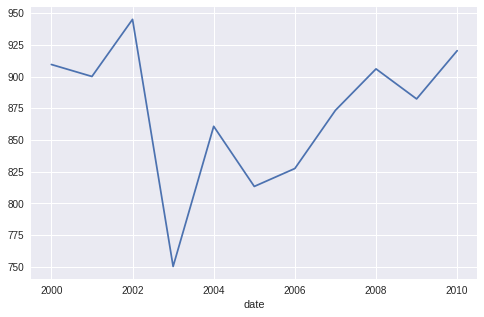

In [11]:
#::GMG::Dibujamos con MatPlotLib
sumario_anual.plot(figsize=(8,5))

#### Mensual

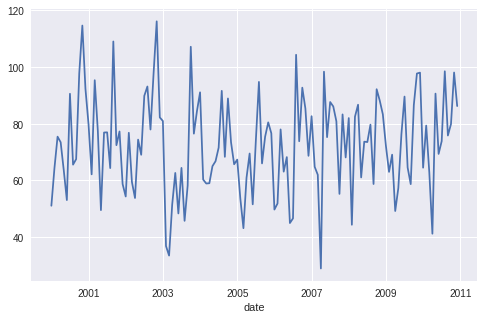

In [12]:
sumario_mensual.plot(figsize=(8,5))

#### Estacional

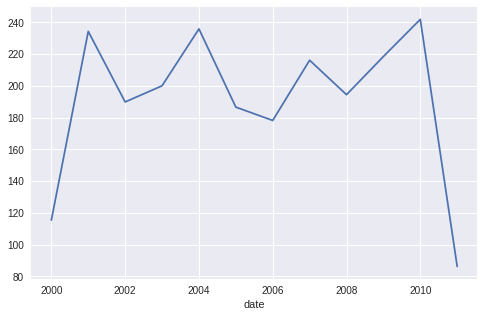

In [13]:
#::GMG::Invierno
#::nota::los inviernos acaban en febrero, es decir, en el mes 2
#::nota::intuyo que hay un 'efecto frontera' de los años en los que no tenemos
#        el invierno completo, i.e. 2000 y 2010 :)
sumario_estacional[sumario_estacional.index.month==2].plot(figsize=(8,5))

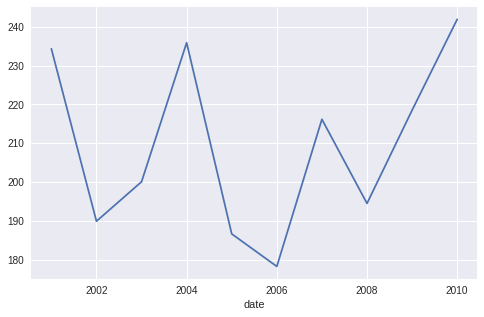

In [14]:
#::GMG::Podemos 'quitarlos'
sumario_estacional[1:-1][
    sumario_estacional[1:-1].index.month==2
].plot(figsize=(8,5))

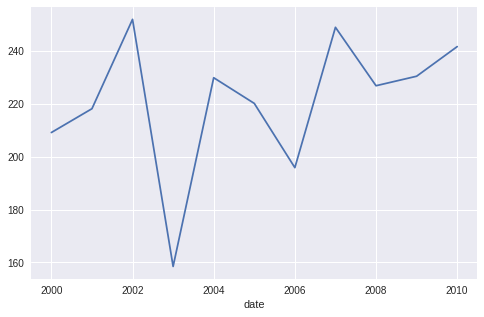

In [15]:
#::GMG::Verano
sumario_estacional[sumario_estacional.index.month==8].plot(figsize=(8,5))

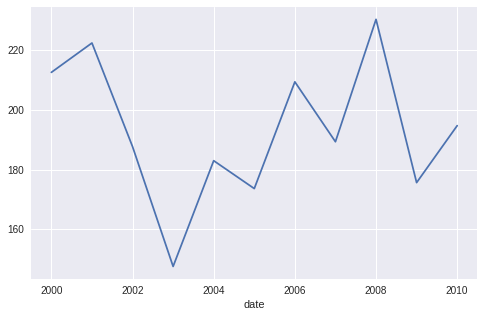

In [16]:
#::GMG::Primavera
sumario_estacional[sumario_estacional.index.month==5].plot(figsize=(8,5))

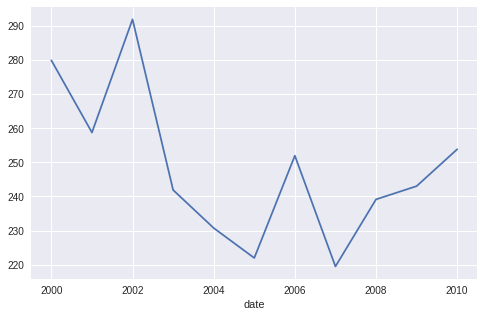

In [17]:
#::GMG::Otoño
sumario_estacional[sumario_estacional.index.month==11].plot(figsize=(8,5))

### Ejercicio 3

Dibujar la distribución espacial de las estaciones, así como los valores promedio y máximo.


### Ejercicio 4

Calcular la frecuencia de días con precipitaciones mayores (>) de 1 mm.

In [63]:
#::GMG::Como prueba de concepto vamos a calcular el valor para la primera
#       estación (12) en el primer mes del año 2000
#::nota::supongo que las unidades de cada estación están escaladas a mm
precipitaciones.loc['2000-01',12]

date
2000-01-01    0.0
2000-01-02    0.0
2000-01-03    0.0
2000-01-04    0.0
2000-01-05    0.0
2000-01-06    0.0
2000-01-07    0.0
2000-01-08    0.0
2000-01-09    0.0
2000-01-10    0.0
2000-01-11    0.0
2000-01-12    0.0
2000-01-13    0.0
2000-01-14    0.0
2000-01-15    0.0
2000-01-16    0.0
2000-01-17    0.0
2000-01-18    5.5
2000-01-19    0.0
2000-01-20    0.0
2000-01-21    0.7
2000-01-22    0.4
2000-01-23    0.1
2000-01-24    0.0
2000-01-25    0.0
2000-01-26    0.0
2000-01-27    0.0
2000-01-28    0.0
2000-01-29    0.1
2000-01-30    2.4
2000-01-31    0.0
Name: 12, dtype: float64

In [81]:
#::GMG::Tenemos dos valores por encima de 1, ¿cómo los cuento?
precipitaciones.loc['2000-01',12][
    precipitaciones.loc['2000-01',12]  > 1
].count()

2

In [64]:
#::GMG::Me pregunto si funciona con la presencia de NaN .... hagamos el experimento
precipitaciones.loc['2003-01',12]

date
2003-01-01    0.0
2003-01-02    0.0
2003-01-03    0.0
2003-01-04    4.2
2003-01-05    0.4
2003-01-06    7.0
2003-01-07    1.8
2003-01-08    0.8
2003-01-09    8.3
2003-01-10    0.2
2003-01-11    0.0
2003-01-12    0.0
2003-01-13    0.0
2003-01-14    0.0
2003-01-15    0.0
2003-01-16    0.0
2003-01-17    0.0
2003-01-18    0.0
2003-01-19    0.0
2003-01-20    0.0
2003-01-21    0.0
2003-01-22    3.8
2003-01-23    0.0
2003-01-24    0.0
2003-01-25    0.0
2003-01-26    0.0
2003-01-27    NaN
2003-01-28    0.1
2003-01-29    NaN
2003-01-30    0.2
2003-01-31    0.5
Name: 12, dtype: float64

In [65]:
#::GMG:: ---> OK (!)
precipitaciones.loc['2003-01',12][precipitaciones.loc['2003-01',12]  > 1].count()

5

In [66]:
#::GMG::La cuenta total TAMPOCO tiene en cuenta los NAN (!!)
precipitaciones.loc['2003-01',12].count()

29

In [67]:
#::GMG::Se puede hacer un workaround con len()
len(precipitaciones.loc['2003-01',12])

31

In [85]:
#::GMG::Teniendo en cuenta que count() no cuenta los NaN podemos simplificar
#       la cuenta
precipitaciones[precipitaciones  > 1].loc['2000-01',12].count()

2

In [86]:
#::GMG::Y podemos extenderlo a todas las estaciones :)
precipitaciones[precipitaciones  > 1].loc['2000-01',:].count()

12       2
13       6
14       9
15      15
16       8
17      10
21       1
28      11
29      12
30      12
32       2
38       6
39       1
42      10
48       8
54      11
58      12
59       4
62       1
63      10
107     13
113      9
173      1
175      2
176      0
177      0
190      7
191     13
192     10
194     18
        ..
351      3
355      5
450      7
462      9
465      7
468     10
483     11
708      9
800      2
951     10
1009    12
1020    11
1051    25
1394     7
1427    14
1662     2
1684     6
1686     4
1687     7
2006    21
2062     3
2762     8
3919     5
3946     4
3991     5
3994     9
4002    10
4004     9
5585    10
7682     9
Length: 86, dtype: int64

In [97]:
print('Estacion 12: Año 2000\n\nMes Ene: {}\nMes Feb: {}\nMes Mar: {}'.format(
        precipitaciones[precipitaciones  > 1].loc['2000-01',12].count(),
        precipitaciones[precipitaciones  > 1].loc['2000-02',12].count(),
        precipitaciones[precipitaciones  > 1].loc['2000-03',12].count()
    )
)


Estacion 12: Año 2000

Mes Ene: 2
Mes Feb: 0
Mes Mar: 7


In [88]:
#::GMG::Y para todas las series? --> OK (!)
#       Voy a ver que pasa con la estación '12' si cuento los tres primeros
#       meses

precipitaciones[precipitaciones  > 1].loc['2000-01':'2000-03',12].count()

9

In [98]:
#::GMG::El total sería ....
precipitaciones[precipitaciones  > 1].loc[:,12].count()

999

In [101]:
#::GMG::Y la frecuencia relativa
precipitaciones[precipitaciones  > 1].loc[:,12].count()/len(precipitaciones[precipitaciones  > 1].loc[:,12])

0.24863115978098557

In [102]:
#::GMG::Todas las series tienen la misma longitud, la del dataframe (!!)
precipitaciones[precipitaciones  > 1].loc[:,12].count()/precipitaciones.shape[0]

0.24863115978098557

In [103]:
#::GMG::Tras la prueba de concepto solamente nos queda seleccionar todos los 
#       días en los que la precipitación es mayor que 1, contarlos y dividirlos 
#       entre el número de días, por cada estación del dataframe
precipitaciones[precipitaciones  > 1].loc[:,:].count()/precipitaciones.shape[0]

12      0.248631
13      0.319313
14      0.373071
15      0.544301
16      0.264062
17      0.314335
21      0.260080
28      0.288950
29      0.302140
30      0.283474
32      0.298905
38      0.277252
39      0.127675
42      0.331508
48      0.382529
54      0.287954
58      0.486809
59      0.198357
62      0.143853
63      0.172474
107     0.346939
113     0.274017
173     0.209308
175     0.151319
176     0.170483
177     0.198855
190     0.211299
191     0.232205
192     0.284221
194     0.448731
          ...   
351     0.290443
355     0.298905
450     0.239423
462     0.343206
465     0.263315
468     0.353907
483     0.302638
708     0.294176
800     0.233201
951     0.196864
1009    0.314833
1020    0.279243
1051    0.341215
1394    0.365107
1427    0.300398
1662    0.204828
1684    0.294176
1686    0.200100
1687    0.338228
2006    0.539074
2062    0.154555
2762    0.320557
3919    0.141364
3946    0.148581
3991    0.301145
3994    0.275510
4002    0.430811
4004    0.3183